# MORPHOLOGICAL TRANSFORMATION IN OPENCV

Morphological transformation are a set of image processing techniques used to manipulate the shape or structure of objects in a binary image (where the pixel values are either 0 or 255). These operations are typically used for tasks like:

- Noise Removal.
- Object Separation.
- Image Enhancement.
- Shape Manipulation: They are based on two main operations. Dilations and Erosion, which work on an image using a structuring element(kernel).

## BASIC CONCEPTS:

**Kernel/Structuring Element:**
    A kernel or structuring element is a small matrix used to apply effects like blurring, sharpening, edge detection, and morphological transformations to an image. It defines the neighborhood of pixels that will be considered for the operation. The size and shape of the kernel can vary, but common shapes include squares and circles.

**Foreground:**
    The foreground refers to the main objects or regions of interest in an image. In binary images, these are typically represented by white pixels (value 1) against a black background (value 0). For example, in an image of text, the letters would be the foreground.

**Background:**
    The background is the part of the image that is not of primary interest, usually represented by black pixels (value 0) in binary images. It serves as the backdrop against which the foreground objects are placed. In the text image example, the space around the letters would be the background.

## USES OF MORPHOLOGICAL TRANSFROMATION:


# IMPORTING LIBRARIES

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# READING IMAGE

In [11]:
img = cv.imread('j.png',0)
img = cv.cvtColor(img,cv.COLOR_RGB2BGR)

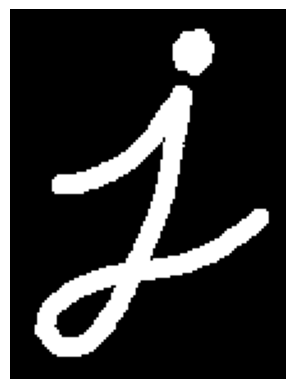

In [13]:
plt.imshow(img)
plt.axis('off')
plt.show()

# STRUCTURING ELEMENT OR KERNEL

In [125]:
kernel = np.ones((3,3),np.uint8)

In [127]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

# EROSION

**How it works:** Erosion reduces the size of foreground objects. It slides the kernel over the image and replaces the pixel under the kernel with the minimum value in the neighbourhood.  This operation erodes boundaries of the foreground object.

**Usage:** Removes small white noise, disconnects small connected objects.

In [153]:
erosion = cv.erode(img,kernel, iterations = 2)

# DIALATION

**How it works:** Dilation increases the size of the forground objects in an image.  It slides a  kernel over the image, and for each pixel, it replaces the pixel value with the **maximum** value of the neighbouring pixels defined by the kernel.  This operation adds pixels to the boundaries of objects, effectively expanding them.

**Usage:** Dilation is used to fill in small holes, gaps, or cracks within objects.  It connects disjointobjects, enhances features, and can make certain details more prominent.  It's partcularly useful when you want to emphasize or enlarge the features of interest in an image.

In [156]:
dilation = cv.dilate(img,kernel,iterations = 2)

# MORPHOLOGICAL OPENING - EROSION FOLLOWED BY DILATION

**How it works:** Opening is a morphological operation that combines **erosion followed by dilation** using the same structuring element. First, erosion removes small objects or noise from the foreground. Then, dilation restores the size of the remaining objects to their original form, but without the small noise.

**Usage:** Opening us used to remove sall objects or noise from an image while preserving the shape and size of larger objects in the foreground.  It's effective for eliminating tiny details or specks without affecting the main objects.

In [159]:
open = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)

# MORPHOLOGICAL CLOSING - DILATION FOLLOWED BY EROSION

**How it works:** Closing is the the reverse of opening.  It involves **dilation followed by erosion**.  Initially, dilation fills in small holes or gaps within the foreground objects.  Subsequently, erosion restores the original size of the objects but keeps the holes filled.

**Usage:** Closing is utilized to close small holes or dark spots within objects.  It smooths objects more solid and wliminate small imperfections.

In [162]:
close = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

# MORPHOLOGICAL GRADIENT - EROSION, DILATION, DIFFERENCE OF BOTH

**How is works:** The morphological gradient is calculated by taking the difference between the **dilation and erosion** of an image:
    This operation highlights the edges or boundaries of objects by emphasizing the difference between the expanded and eroded versions of the image.

**Usage:** The morphological gradient is used for edge detection and boundary extraction.  It accentuates the outlines of objects, making it easier to identify and analyze shape and structures within the image.

In [165]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)

# TOP HAT - OPENING AND DIFFERENCE OF ORGINAL AND OPENING 

**How it works:** The top hat transformation is computed by subtracting the **opening** of an image from the **original image:**
    That operation extracts small bright elements or details that are smaller than the structuring element used.

**Usage:** Top Hat is used to enhance bright features on a dark background.  It's particularly useful for detection.

In [168]:
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)

# BLACK HAT - OPPOSITE OF TOP HAT

**How it works:** The black hat transformation is obtained by subtracting the **original image** from its **closing:**
    This operation extracts small dark elements or details on a background.

**Usage:** Black hat is employed t  enhance dark features on a bright background.  It's useful for identifying dark spots, shadows, or small depressions in images, such as cracks in materials or textural imperfections. 

In [171]:
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

# DISPLAY RESULTS

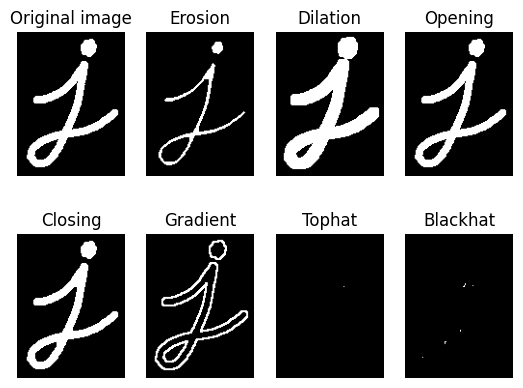

In [174]:
titles = ['Original image', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient', 'Tophat', 'Blackhat']
images = [img, erosion, dilation, open, close, gradient, tophat, blackhat]

for i in range(len(images)):
    plt.subplot(2, 4, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    #plt.xticks([]),plt.yticks([])
    plt.axis('off')

plt.show()